# EDA

In [1]:
import pandas as pd

# Load the dataset
file_path = "diabetic_data.csv"
df = pd.read_csv(file_path)

# Basic info and preview
basic_info = df.info()
head = df.head()
summary = df.describe(include='all')

# Check for missing values
missing_values = df.isnull().sum()

# Unique values in each column
unique_values = df.nunique()

# Data types
data_types = df.dtypes

(basic_info, head, summary, missing_values, unique_values, data_types)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

(None,
    encounter_id  patient_nbr             race  gender      age weight  \
 0       2278392      8222157        Caucasian  Female   [0-10)      ?   
 1        149190     55629189        Caucasian  Female  [10-20)      ?   
 2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
 3        500364     82442376        Caucasian    Male  [30-40)      ?   
 4         16680     42519267        Caucasian    Male  [40-50)      ?   
 
    admission_type_id  discharge_disposition_id  admission_source_id  \
 0                  6                        25                    1   
 1                  1                         1                    7   
 2                  1                         1                    7   
 3                  1                         1                    7   
 4                  1                         1                    7   
 
    time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
 0                 1  ...          No      

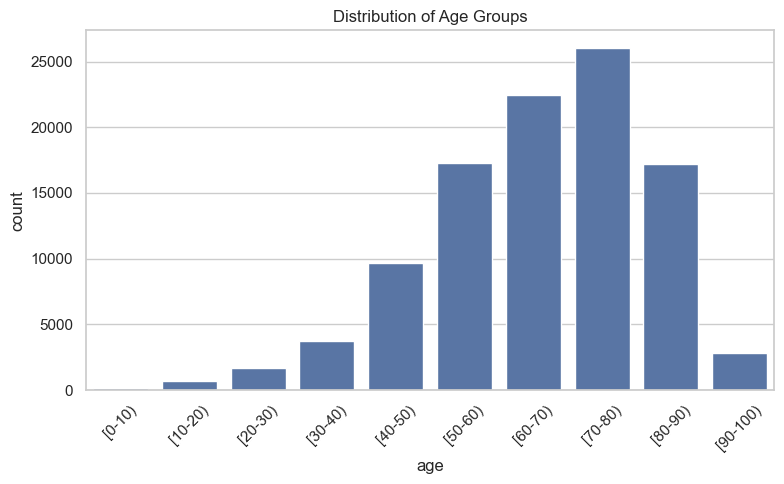

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Replace '?' with NaN for proper handling
df.replace('?', pd.NA, inplace=True)

# Set up visual style
sns.set(style="whitegrid")

# Plot 1: Distribution of Age Groups
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age', order=sorted(df['age'].dropna().unique()))
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


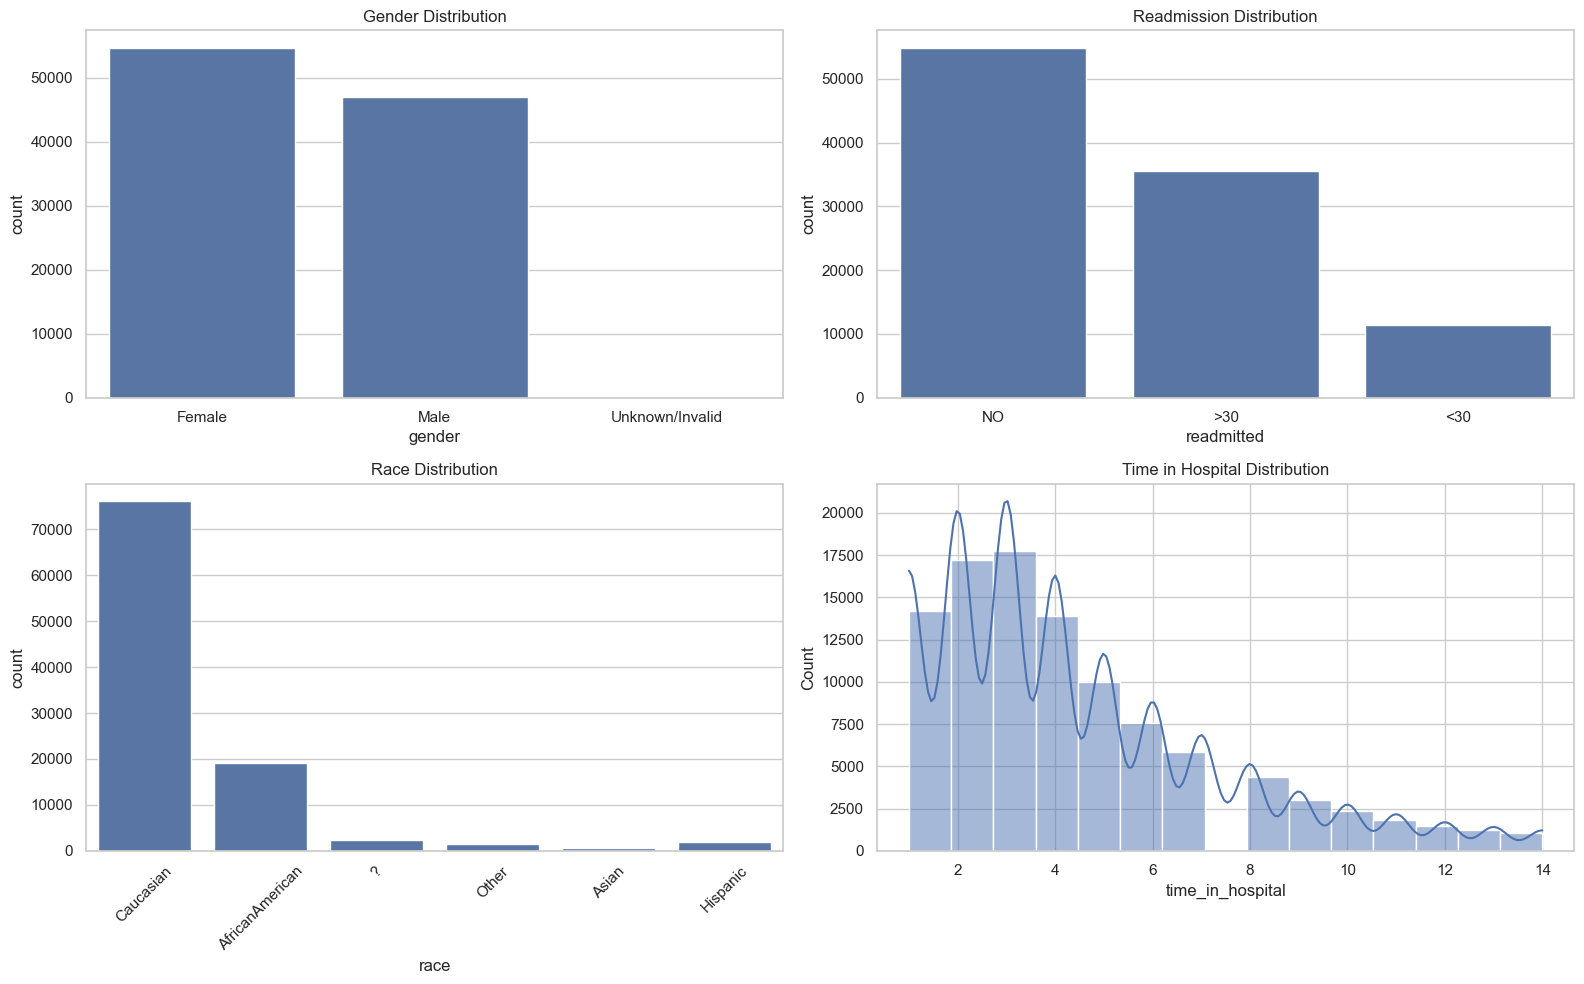

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create multiple plots for EDA
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gender Distribution
sns.countplot(data=df, x='gender', ax=axes[0, 0])
axes[0, 0].set_title("Gender Distribution")

# Readmission Distribution
sns.countplot(data=df, x='readmitted', order=['NO', '>30', '<30'], ax=axes[0, 1])
axes[0, 1].set_title("Readmission Distribution")

# Race Distribution
sns.countplot(data=df, x='race', ax=axes[1, 0])
axes[1, 0].set_title("Race Distribution")
axes[1, 0].tick_params(axis='x', rotation=45)

# Time in Hospital Distribution
sns.histplot(data=df, x='time_in_hospital', bins=15, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Time in Hospital Distribution")

plt.tight_layout()
plt.show()